In [2]:
from aqua import Reader
import sys
from aqua.diagnostics import GlobalBiases

from dask.distributed import Client
client = Client()


/LUMI_TYKKY_IfslzmF/miniconda/envs/env1/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36529 instead
  warnings.warn(


In [11]:
reader_era5 = Reader(model="ERA5", exp="era5", source="monthly")
data_era5 = reader_era5.retrieve(startdate="1990-01-01", enddate="2020-12-31")

reader_ifs_nemo = Reader(model = 'IFS-NEMO', exp = 'historical-1990', source = 'lra-r100-monthly')
data_ifs_nemo = reader_ifs_nemo.retrieve(startdate="1990-01-01", enddate="2002-02-01")

2024-11-06 13:30:53 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-11-06 13:30:53 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly


In [14]:
global_biases = GlobalBiases(data=data_ifs_nemo, data_ref=data_era5, var_name='2t', loglevel = 'INFO',
                              model="IFS-NEMO", exp="historical-1990", startdate_data="1990-01-01", enddate_data="2002-02-01",
                              model_obs="ERA5", startdate_obs="1990-01-01", enddate_obs="2002-02-01")

2024-11-06 13:31:51 :: Atmospheric global :: INFO     -> Plotting global biases.
2024-11-06 13:31:51 :: Atmospheric global :: INFO     -> Plotting bias map between two datasets.


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': '2t global bias of IFS-NEMO historical-1990 1990-01-01/2002-02-01\nrelative to ERA5 climatology 1990-01-01/2002-02-01\n'}, xlabel='lon', ylabel='latitude [degrees_north]'>)

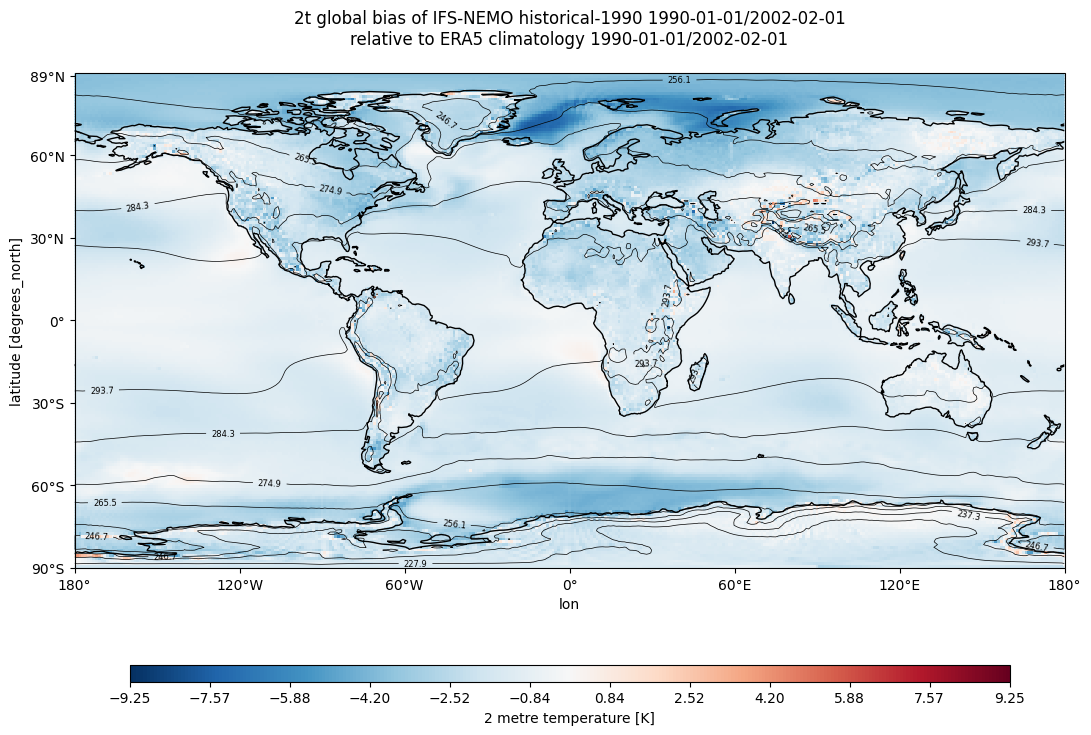

In [15]:
global_biases.plot_bias()

2024-11-06 13:14:32 :: Atmospheric global :: INFO     -> Plotting seasonal biases.


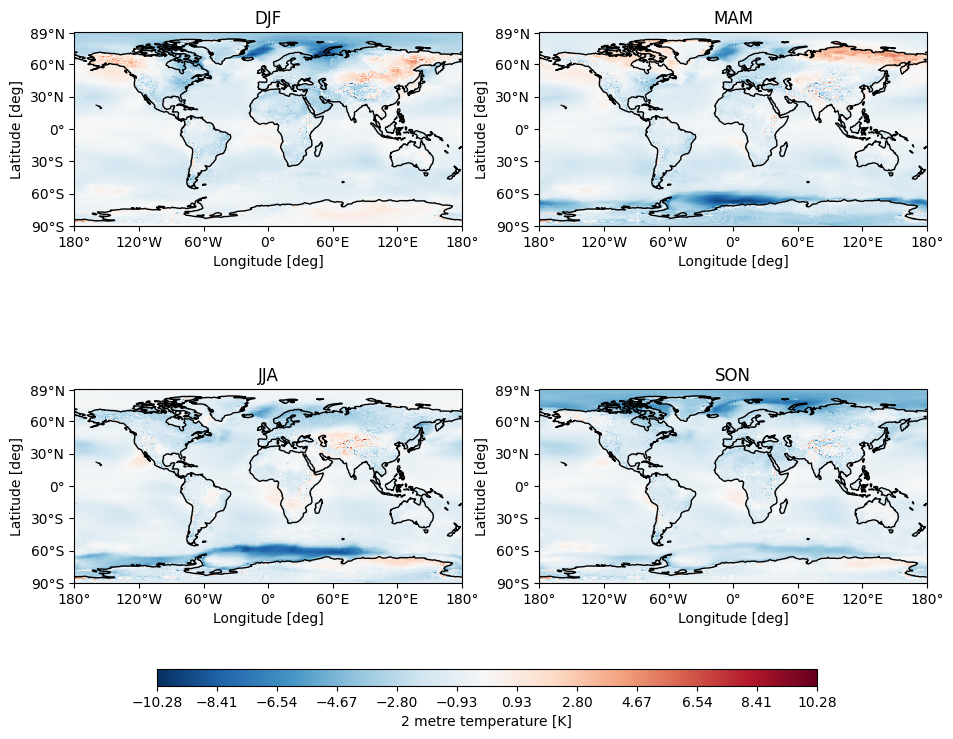

In [ ]:
global_biases.plot_seasonal_bias()

2024-11-06 13:32:47 :: Atmospheric global :: INFO     -> Plotting vertical biases.


(<Figure size 1000x800 with 2 Axes>,
 <Axes: title={'center': 'q vertical bias of IFS-NEMO historical-1990 1990-01-01/2002-02-01\nrelative to ERA5 climatology 1990-01-01/2002-02-01\n'}, xlabel='Latitude', ylabel='Pressure Level (Pa)'>)

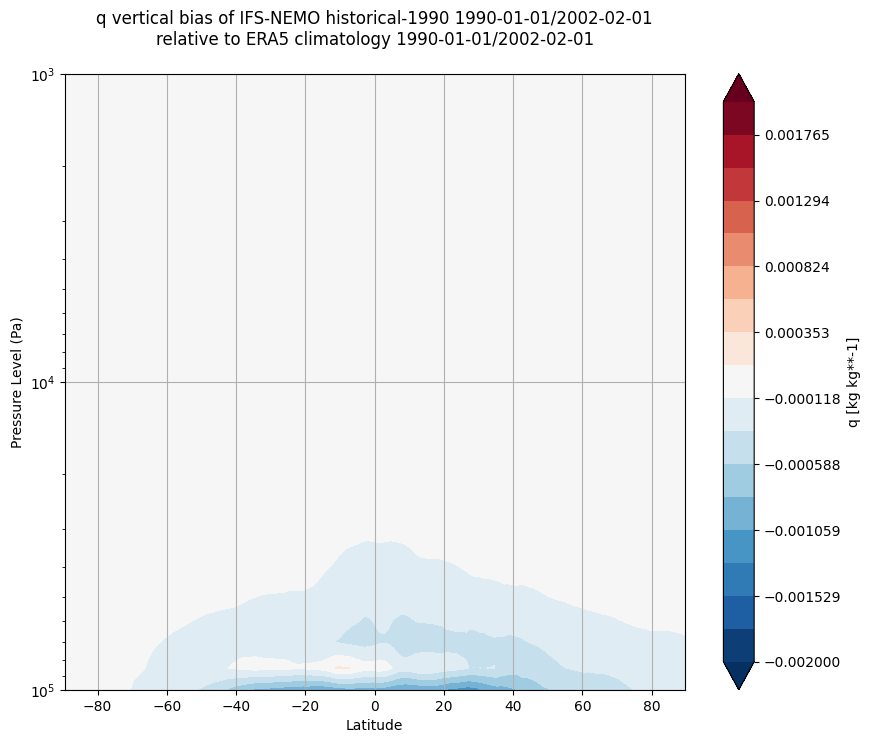

In [16]:
global_biases.plot_vertical_bias(var_name='q', vmin= -0.002, vmax= 0.002)